In [91]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [108]:
#CARGAR EL CONJUNTO DE DATOS FASHION_MNIST
(train_images, train_labels),(test_images, test_labels)= keras.datasets.fashion_mnist.load_data()
etiqueta= pd.DataFrame(train_labels)

etiqueta.head(5)

In [106]:
# Clases de las prendas de vestir
prendas = {
    0: 'Camiseta/top',
    1: 'Pantalón',
    2: 'Jersey',
    3: 'Vestido',
    4: 'Abrigo',
    5: 'Sandalia',
    6: 'camisa',
    7: 'Sneaker',
    8: 'Bolsa',
    9: 'Botín'
}

In [96]:
#PROCESAR LOS DATOS
train_images = train_images / 255.0
test_images = test_images / 255.0


In [83]:
#DEFINIR LA ARQUITECTURA DEL MODELO
model = keras.Sequential(
    [
       
    keras.layers.Conv2D(32, (3, 3), padding='same', activation ='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
                        
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 6272)             

In [84]:
#COMPILAR EL MODELO
model.compile( optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#ENTRENAR EL MODELO

model.fit(train_images.reshape((-1,28,28,1)), train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.3981 - accuracy: 0.8547
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2532 - accuracy: 0.9065
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2097 - accuracy: 0.9224
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1743 - accuracy: 0.9351
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1458 - accuracy: 0.9448
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1202 - accuracy: 0.9544
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0988 - accuracy: 0.9630
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0811 - accuracy: 0.9689
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0660 - accuracy: 0.9751
Epoch 10/10
1875/1875 [==============================] - 63s 34m

In [85]:
#EVALUAR EL MODELO DEL CONJUNTO DE PRUEBA
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\n Test_acc:', test_acc)
print('\n Test_loss:', test_loss)



313/313 [==============================] - 4s 12ms/step - loss: 0.3275 - accuracy: 0.9207

 Test_acc: 0.9207000136375427

 Test_loss: 0.32749268412590027


In [86]:
#HACER PREDICCIONES EN EL MODELO
predictions=model.predict(test_images.reshape((-1, 28,28,1)))

313/313 [==============================] - 4s 11ms/step


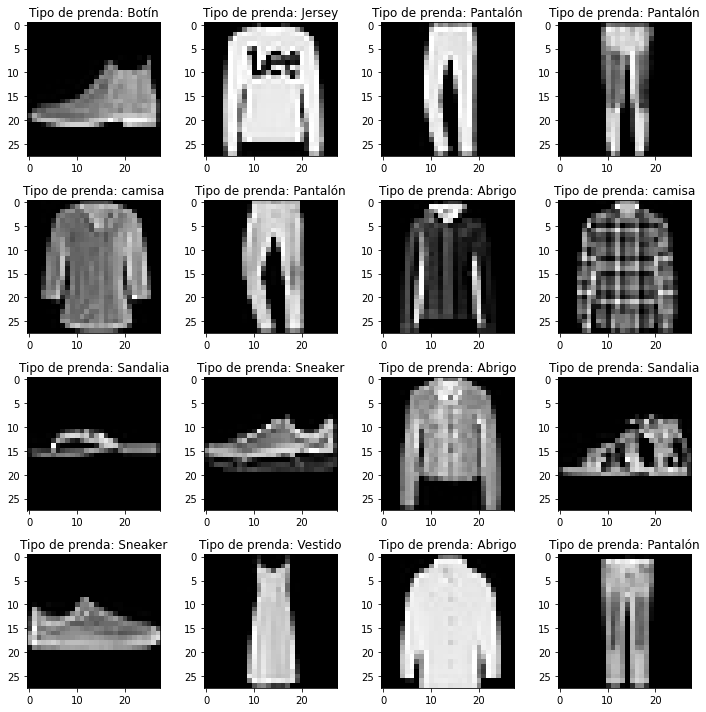

In [110]:
#Clasificacion imagenes de prendas de vestir con sus predicciones correspondientes
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
axs = axs.flatten()
for i in range(16):
    imagen = test_images[i].reshape(28, 28)
    axs[i].imshow(imagen, cmap='gray')
    axs[i].set_title(f"Tipo de prenda: {prendas.get(np.argmax(predictions[i]))}")
plt.tight_layout()
plt.show()